In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
if torch.backends.mps.is_available():
    print("MPS backend is available. Using GPU acceleration!")
else:
    print("MPS backend is not available. Falling back to CPU.")

MPS backend is available. Using GPU acceleration!


In [7]:
image_path = "../data/content/helicopter.jpg"  # Remplacez par votre image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
mask = np.zeros(image.shape[:2], np.uint8)

# Création des modèles de fond et de premier plan (requis par GrabCut)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Définir un rectangle autour de l’hélicoptère (à ajuster selon votre image)
rect = (50, 50, image.shape[1]-50, image.shape[0]-50) 

In [9]:
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)  

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3]], dtype=uint8),
 array([[ 6.49274999e-01,  4.90557262e-02,  9.13524009e-02,
          1.50227394e-01,  6.00894808e-02,  1.50947233e+02,
          2.03111004e+02,  2.45578596e+02,  1.20803145e+02,
          1.35506735e+02,  1.83710437e+02,  1.14756859e+02,
          1.23931790e+02,  1.38470562e+02,  1.70510001e+02,
          2.08750590e+02,  2.40883084e+02,  1.51990232e+02,
          1.63552341e+02,  1.98672503e+02,  6.22986779e+01,
          2.55334548e+01,  7.97124006e-01,  2.55334548e+01,
          1.13091705e+01,  3.43878902e-01,  7.97124006e-01,
          3.43878902e-01,  1.02897891e+00,  1.02625557e+02,
          8.96788034e+01,  5.79122209e+01,  8.96788034e+01,
          1.30969046e+02,  1.55049734e+02,  5.79122209e+01,
          1.55049734e+02,  2.55839398e+02,  2.24851352

In [10]:
mask = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

# Appliquer le masque sur l'image pour isoler l’hélicoptère
isolated_helicopter = image * mask[:, :, np.newaxis]

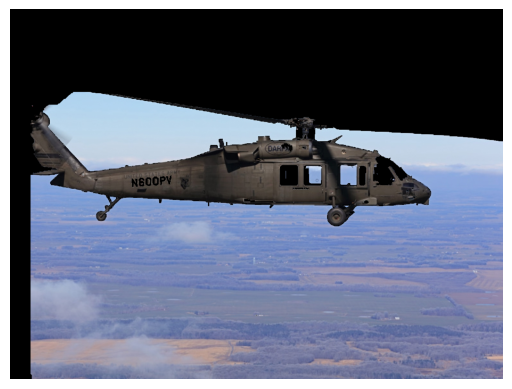

In [11]:
plt.imshow(isolated_helicopter)
plt.axis("off")
plt.show()

In [ ]:
cv2.imwrite("isolated_helicopter.jpg", cv2.cvtColor(isolated_helicopter, cv2.COLOR_RGB2BGR))

2166323073961557382463235264778187954767951899579521884911749141815166917768056633646824067318712225871550633171925355564906025115638044857878569891843414846307413324707511313247266239236774741772624822915918442537622628917260707314565701879241499870498583771093167297022939238794527693358867266016175252639871156716646566862026946552693688226163413890167864080356863316871962066199873051047909315137014832280604022865987648084667037593175752940697527745328606096862580633856379861981338891687769791670629876390059947635721832760862222681205438365865743021171015680000000000000000000000000000000000000000000000000000000000000000000000000000


KeyboardInterrupt: 

640
